<div class="alert alert-block alert-danger">
    
### Notes

</div>

### Naive Bayes, Discriminant Analysis, Numerical python, $ \ldots $.

<hr/>

#### Naive Bayes


Let $ \mathbf{x} \in \mathbb{R}^{n}$ and $ \{ C_k \}_{k=1}^m $ be the set of outcomes.

Assuming mutual independence in $\mathbf{x}$, $ P(C_k \mid \mathbf{x}) = \frac{P(C_k, \mathbf{x})}{P(\mathbf{x})} \propto P(\mathbf{x}, C_k) \propto P(C_k) \Pi^n_{i=1} P(x_i \mid C_k) $

Maximum a posteriori, $argmax_{\forall{k}} \{ P(C_k) \Pi^n_{i=1} P(x_i \mid C_k) \} $

Useful distributions : {gaussian naive bayes, bernoulli naive bayes, multinomial naive bayes}

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

plt.close('all')
np.random.seed(1234)

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import datasets

***

In [5]:
data = datasets.load_iris()
X, Y = data.data, data.target

In [6]:
gnb = GaussianNB().fit(X, Y)
gnb_predicts = gnb.predict(X)

print(confusion_matrix(Y, gnb_predicts))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


***

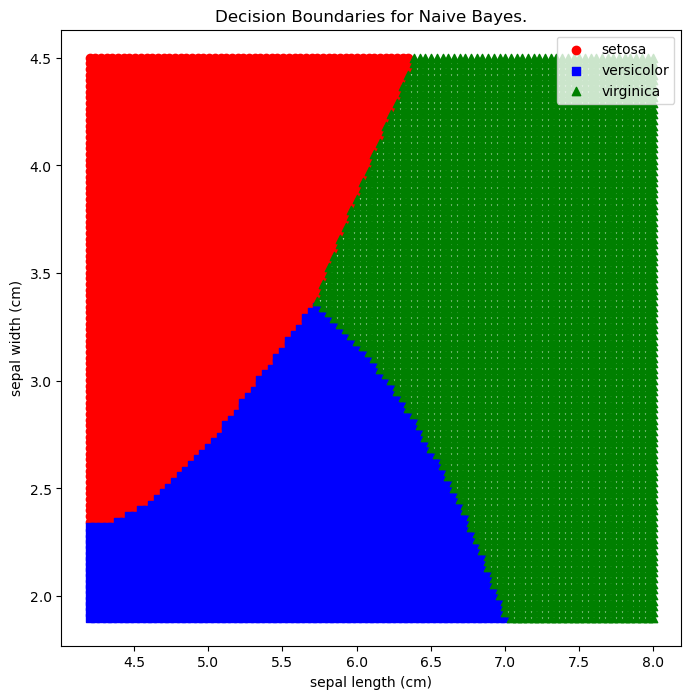

In [7]:
def classify_and_plot_decision_boundaries():
    
    plots = { 0 : ([], []), 1 : ([], []), 2 : ([], []) }
    markers = { 0 : "o", 1 : "s", 2 : "^" }
    colors  = { 0 : "r", 1 : "b", 2 : "g" }
    
    min_sepal_length, max_sepal_length = np.min(X[:, 0])-0.1, np.max(X[:, 0])+0.1
    min_sepal_width, max_sepal_width = np.min(X[:, 1])-0.1, np.max(X[:, 1])+0.1

    gnb = GaussianNB().fit(X[:,:2], Y)
    
    for sepal_length in np.linspace(min_sepal_length, max_sepal_length, 100):
        for sepal_width in np.linspace(min_sepal_width, max_sepal_width, 100):
            predicted_label = gnb.predict(np.expand_dims(np.array([sepal_length, sepal_width]), axis=0))
            plots[predicted_label[0]][0].append(sepal_length)
            plots[predicted_label[0]][1].append(sepal_width)

    plt.figure(figsize=(8,8))
    for label, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[label], marker=markers[label],
                          label=data.target_names[label], zorder=0)

    plt.legend(loc=0)
    plt.title('Decision Boundaries for Naive Bayes.')
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])
    plt.show()


classify_and_plot_decision_boundaries()            

<hr/>

#### Bayes

Let $ \mathbf{x} \in \mathbb{R}^{n}$ and $ \{ C_k \}_{k=1}^m $ be the set of outcomes.

\begin{align}
P( C_k \mid \mathbf{x}) &= \frac{P(\mathbf{x} \mid C_k)P(C_k)}{P(\mathbf{x})} \\
&\propto P(\mathbf{x} \mid C_k) P(C_k)
\end{align}



#### Linear Discriminant Analysis classifier (homogeneous variance-covariance $\Sigma_k = \Sigma, \forall{k}$)

\begin{align}
P(\mathbf{x} \mid C_k)
&= (2 \pi)^{-\frac{n}{2}} \| \Sigma \|^{-\frac{1}{2}} e^{-\frac{1}{2}(\mathbf{x}-\mu_{C_k})^T \sum^{-1}(\mathbf{x}-\mu_{C_k}) }
\end{align}

<br>

\begin{align}
log(P( C_k \mid \mathbf{x})) 
&\propto log(P(\mathbf{x} \mid C_k) P(C_k)) \\
&= log(P(\mathbf{x} \mid C_k)) + log(P(C_k)) \\
&=(-\frac{n}{2})log(2\pi) - \frac{1}{2} log(\| \Sigma \|)-\frac{1}{2}(\mathbf{x}-\mu_k)^T \Sigma^{-1} (\mathbf{x}-\mu_k) + log(P(C_k)) 
\\
&\propto -\frac{1}{2} (\mathbf{x}-\mu_k)^T \Sigma^{-1} (\mathbf{x}-\mu_k) + log(P(C_k)) \\
&= -\frac{1}{2}[(\mathbf{x}^T \Sigma^{-1} - \mu^T_{k} \Sigma^{-1}) (\mathbf{x}-\mu_k)] + log(P(C_k)) \\
&= -\frac{1}{2}[\mathbf{x}^T \Sigma^{-1} \mathbf{x} - \mathbf{x}^T \Sigma^{-1} \mu_k - \mu^T_k \Sigma^{-1} \mathbf{x} + \mu^T_k \Sigma^{-1} \mu_k] + log(P(C_k)) \\
&= -\frac{1}{2}[\mathbf{x}^T \Sigma^{-1} \mathbf{x} - \mathbf{x}^T \Sigma^{-1} \mu_k - \mathbf{x}^T \Sigma^{-1} \mu_k + \mu^T_k \Sigma^{-1} \mu_k] + log(P(C_k)) \\
&= -\frac{1}{2}[ \mathbf{x}^T \Sigma^{-1} \mathbf{x} - 2 \mathbf{x}^T \Sigma^{-1} \mathbf{\mu}_k + \mathbf{\mu}^T_k \Sigma^{-1} \mathbf{\mu}_k ] + log(P(C_k)) \\
&= -\frac{1}{2} \mathbf{x}^T \Sigma^{-1} \mathbf{x} +\mathbf{x}^T \Sigma^{-1} \mathbf{\mu}_k- \frac{1}{2} \mathbf{\mu}^T_k \Sigma^{-1} \mathbf{\mu}_k + log(P(C_k)) \\
&\propto \mathbf{x}^T \Sigma^{-1} \mathbf{\mu}_k - \frac{1}{2} \mathbf{\mu}^T_k \Sigma^{-1} \mathbf{\mu}_k + log(P(C_k))
\end{align}


\begin{align}
WTS: \arg\max_{\forall_k} \{ \mathbf{x}^T \Sigma^{-1} \mathbf{\mu}_k - \frac{1}{2} \mathbf{\mu}^T_k \Sigma^{-1} \mathbf{\mu}_k + log(P(C_k)) \}
\end{align}


#### Quadratic Discriminant Analysis classifier (heterogeneous variance-covariance)

\begin{align}
log(P( C_k \mid \mathbf{x})) 
&\propto log(P(\mathbf{x} \mid C_k) P(C_k)) \\
&= log(P(\mathbf{x} \mid C_k)) + log(P(C_k)) \\
&=(-\frac{n}{2})log(2\pi) - \frac{1}{2} log(\| \Sigma_k \|) -\frac{1}{2}(\mathbf{x}-\mu_k)^T \Sigma^{-1}_k (\mathbf{x}-\mu_k) + log(P(C_k)) \\
&\propto -\frac{1}{2} log \| \Sigma_k \| -\frac{1}{2} (\mathbf{x} - \mathbf{\mu}_k)^T \Sigma^{-1}_k (\mathbf{x}-\mathbf{\mu}_k) + log(P(C_k))
\end{align}

***

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis(store_covariance=True).fit(X, Y)
lda_predicts = lda.predict(X)

print(confusion_matrix(Y, lda_predicts))

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


In [10]:
lda.covariance_

array([[0.259708  , 0.09086667, 0.164164  , 0.03763333],
       [0.09086667, 0.11308   , 0.05413867, 0.032056  ],
       [0.164164  , 0.05413867, 0.181484  , 0.041812  ],
       [0.03763333, 0.032056  , 0.041812  , 0.041044  ]])

In [11]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, Y)
qda_predicts = qda.predict(X)

print(confusion_matrix(Y, qda_predicts))

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


In [12]:
qda.covariance_

[array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
        [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
        [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
        [0.01033061, 0.00929796, 0.00606939, 0.01110612]]),
 array([[0.26643265, 0.08518367, 0.18289796, 0.05577959],
        [0.08518367, 0.09846939, 0.08265306, 0.04120408],
        [0.18289796, 0.08265306, 0.22081633, 0.07310204],
        [0.05577959, 0.04120408, 0.07310204, 0.03910612]]),
 array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
        [0.09376327, 0.10400408, 0.07137959, 0.04762857],
        [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
        [0.04909388, 0.04762857, 0.04882449, 0.07543265]])]

In [13]:
set_covmatrix, ver_covmatrix, vir_covmatrix = np.cov(X[Y==0], rowvar=0), np.cov(X[Y==1], rowvar=0), np.cov(X[Y==2], rowvar=0)
print(set_covmatrix, ver_covmatrix, vir_covmatrix, sep='\n\n')

[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]

[[0.26643265 0.08518367 0.18289796 0.05577959]
 [0.08518367 0.09846939 0.08265306 0.04120408]
 [0.18289796 0.08265306 0.22081633 0.07310204]
 [0.05577959 0.04120408 0.07310204 0.03910612]]

[[0.40434286 0.09376327 0.3032898  0.04909388]
 [0.09376327 0.10400408 0.07137959 0.04762857]
 [0.3032898  0.07137959 0.30458776 0.04882449]
 [0.04909388 0.04762857 0.04882449 0.07543265]]


***

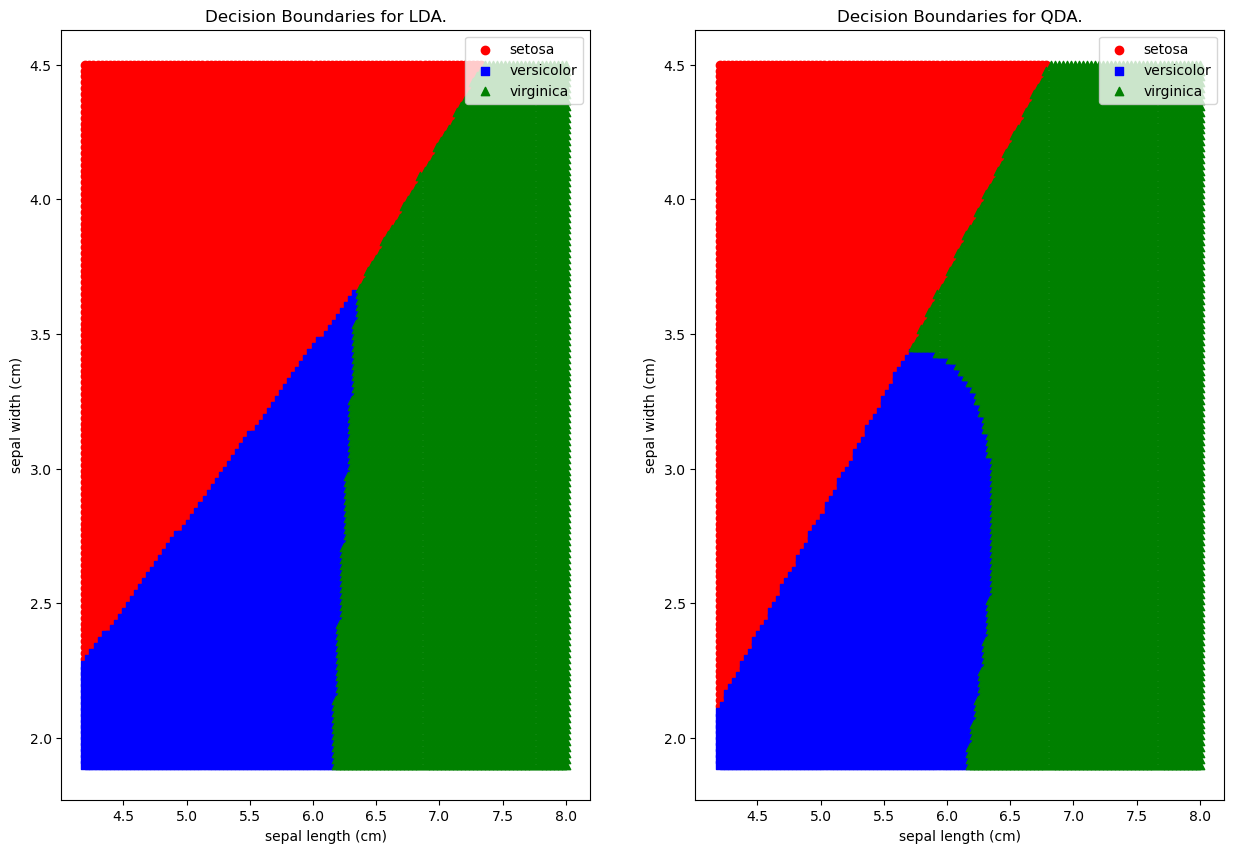

In [14]:
def classify_and_plot_decision_boundaries():
    
    lda_plots = { 0 : ([], []), 1 : ([], []), 2 : ([], []) }
    qda_plots = { 0 : ([], []), 1 : ([], []), 2 : ([], []) }
    markers = { 0 : "o", 1 : "s", 2 : "^" }
    colors  = { 0 : "r", 1 : "b", 2 : "g" }
    
    min_sepal_length, max_sepal_length = np.min(X[:, 0])-0.1, np.max(X[:, 0])+0.1
    min_sepal_width, max_sepal_width = np.min(X[:, 1])-0.1, np.max(X[:, 1])+0.1

    lda = LinearDiscriminantAnalysis(store_covariance=False).fit(X[:, :2], Y)
    qda = QuadraticDiscriminantAnalysis(store_covariance=False).fit(X[:, :2], Y)
    
    for sepal_length in np.linspace(min_sepal_length, max_sepal_length, 120):
        for sepal_width in np.linspace(min_sepal_width, max_sepal_width, 120):
            lda_predicted_label = lda.predict(np.expand_dims(np.array([sepal_length, sepal_width]), axis=0))
            qda_predicted_label = qda.predict(np.expand_dims(np.array([sepal_length, sepal_width]), axis=0))
            lda_plots[lda_predicted_label[0]][0].append(sepal_length)
            lda_plots[lda_predicted_label[0]][1].append(sepal_width)
            qda_plots[qda_predicted_label[0]][0].append(sepal_length)
            qda_plots[qda_predicted_label[0]][1].append(sepal_width)

    plt.figure(figsize=(15,10))
    
    plt.subplot(1,2,1)
    for label, (x, y) in lda_plots.items():
        plt.scatter(x, y, color=colors[label], marker=markers[label],
                          label=data.target_names[label], zorder=0)
    plt.legend(loc=0)
    plt.title('Decision Boundaries for LDA.')
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])
    
    plt.subplot(1,2,2)
    for label, (x, y) in qda_plots.items():
        plt.scatter(x, y, color=colors[label], marker=markers[label],
                          label=data.target_names[label], zorder=0)
    plt.legend(loc=0)
    plt.title('Decision Boundaries for QDA.')
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])
    
    plt.show()


classify_and_plot_decision_boundaries()            